# FODS ASSIGNMENT-1

# TASK --- 1

### Loading data


In [867]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data.csv')
print(data)
# Loaded the dataset into a pandas DataFrame

            X         Y
0    0.987988  5.098368
1    0.719720  2.516654
2   -0.403403  0.337961
3    0.107107  0.737320
4    0.345345 -0.780955
..        ...       ...
995  0.671672  3.079356
996 -0.615616  0.027487
997  0.259259  1.068320
998  0.119119  0.245188
999  0.369369  0.545114

[1000 rows x 2 columns]


### Normalize the data


In [868]:
data = pd.read_csv('Data.csv')
X_mean , Y_mean = data.mean()
X_std , Y_std = data.std()
data['X']= (data['X'] - X_mean)/X_std
shuffled_data = data.sample(frac=1)
print(shuffled_data)


            X         Y
788 -1.310507 -1.839809
377  0.590334  0.613372
663  1.317432  4.094605
498  0.569560  0.694708
287  1.300120  1.638130
..        ...       ...
662  0.126377  0.739915
452 -0.060591  0.091065
727 -1.577110 -2.542975
581  0.008656  2.096347
32   0.396441  0.916272

[1000 rows x 2 columns]


### Splitting the data in test and train

In [869]:
split_ratio = 0.8
row_no, col_no = shuffled_data.shape
train_length = int(row_no*split_ratio)

Train = shuffled_data[:train_length]
Test = shuffled_data[train_length:]

X_Train = Train['X'].values
X_Test = Test['X'].values
Y_Test = Test['Y'].values
Y_Train = Train['Y'].values

## Polynomial Transformation function for 1 feature dataset

In [870]:
def poly_transform(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.insert(transform_data, i, transformed_feature, axis=1)
    return transform_data

## Polynomial Regression using Batch Gradient descent

[1.427122074913247, 1.3674951952307257, 0.9881247284840555, 0.9921849738798804, 1.007986432834937, 1.0061066159003536, 0.9884142287485467, 1.0280800274873163, 9.556196079882473e+210]


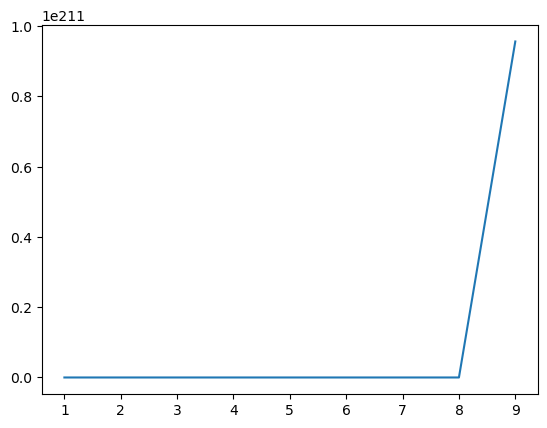

In [871]:
import numpy as np
import matplotlib.pyplot as plt
def bgd_regressor(train, test, learning_rate=0.0022, max_iters=500):
    X = train
    Y = test
    W = np.zeros(train.shape[1])
    n = len(train)
    for _ in range(max_iters):
        Y_pred = np.dot(X, W)
        gradient = np.dot(X.T, Y_pred - Y)
        change = (learning_rate / len(X)) * gradient
        W -= change
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W = bgd_regressor(X_Train_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly, W)
    mse = mean_squared_error(Y_Test, Y_Test_pred)
    output.append(mse)

print(output)
plt.plot(degrees, output)
plt.show()

# Task ---- 2
 

### Loading data


In [872]:
import numpy as np
import pandas as pd
data = pd.read_csv('data2.csv')

### Normalize the data

In [873]:
data = pd.read_csv('data2.csv')
Height_mean , Width_mean , Weight_mean = data.mean()
Height_std , Width_std , Weight_std = data.std()
data['Height'] = (data['Height'] - Height_mean)/ Height_std
data['Width'] = (data['Width'] - Width_mean)/ Width_std
data = np.array(data)
np.random.shuffle(data)
print(data)

[[ 4.45616839e-01  1.45124502e+00  6.85000000e+02]
 [-4.47806985e-01 -4.89294965e-02  2.65000000e+02]
 [ 1.76053214e+00  8.50641341e-01  7.14000000e+02]
 [-1.40888969e+00 -1.50568259e+00  1.99000000e+01]
 [-3.94519785e-01 -5.63443567e-02  4.56000000e+02]
 [-7.92167345e-01 -8.97545415e-01  7.80000000e+01]
 [ 8.07311870e-01  1.74036525e+00  8.20000000e+02]
 [ 1.37403663e+00  5.14837153e-01  7.00000000e+02]
 [-3.23314649e-01  1.29264424e-01  3.00000000e+02]
 [-1.63146407e+00 -1.85803674e+00  8.70000000e+00]
 [ 2.01868576e+00  1.15850634e+00  9.50000000e+02]
 [-5.08373346e-01 -4.70686744e-01  1.50000000e+02]
 [ 6.90028704e-01  1.59503399e+00  8.50000000e+02]
 [-4.79606658e-01 -4.66415785e-01  1.61000000e+02]
 [-2.75066869e-01  2.68426520e-01  5.67000000e+02]
 [ 3.20751212e-01 -4.47196467e-01  2.00000000e+02]
 [ 8.93378630e-01  1.45385505e+00  1.10000000e+03]
 [ 1.39596744e+00  4.46857715e-01  6.00000000e+02]
 [ 1.52855551e+00  5.11693253e-01  6.20000000e+02]
 [ 4.00192068e-01  1.52296154e+

## Splitting the data into test and train

In [874]:
n, m = data.shape
split_ratio = 0.8
Train_2 = data[:int(0.8*n),:]
Test_2 = data[int(0.8*n):,:]
X_Train = Train_2[:,:-1]
Y_Train = Train_2[:,-1]
X_Test = Test_2[:,:-1]
X_Test_Height = X_Test[:,0]
X_Test_Width = X_Test[:,1]
Y_Test = Test_2[:,-1]

## Polynomial Transform Function for multiple feature model

In [875]:
def poly_transform_2(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.concatenate((transform_data,transformed_feature), axis=1)
    return transform_data

# Batch Gradient Descent

## Batch gradient descent with q as 0.5

[234776.65570609132, 227881.02908854777, 214405.05006851105, 182438.98292772827, 146067.3669014487, 141346.9934527909, 148435.1140979558, nan, nan]


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/1557772736.py:13: RuntimeWarning: invalid value encountered in power
  grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5


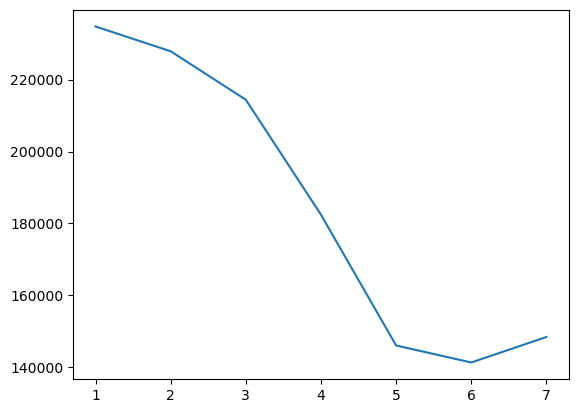

In [876]:
def half_reg(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 0.07, learning_rate = 0.000018):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        Y_pred = np.dot(X,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
        if flag == False:
            grad = 1/n*np.dot(X.T, Y_pred-Y)
        else:
            grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.000005
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


degrees = [1,2,3,4,5,6,7,8,9]
output_bch_half = []
for i in degrees:
    X_Train_poly_bch_half = poly_transform_2(X_Train, i)
    X_Test_poly_bch_half = poly_transform_2(X_Test, i)
    W_bch_half = half_reg(X_Train_poly_bch_half, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_half,W_bch_half)
    mse_bch_half = mean_squared_error(Y_Test, Y_Test_pred)
    output_bch_half.append(mse_bch_half)

print(output_bch_half)
plt.plot(degrees, output_bch_half)
plt.show()

## Batch gradient descent with q as 1

[334.78575798  45.61153554 321.67371313 -15.62009703  77.79428163
   8.51077491 -24.29299927]
9315.110475273454


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/3825926075.py:8: RuntimeWarning: invalid value encountered in subtract
  W -= change


[15868.394442793688, 10742.425978921978, 9315.110475273454, 8929.920592488263, 8897.950044664447, nan, nan, nan, nan]


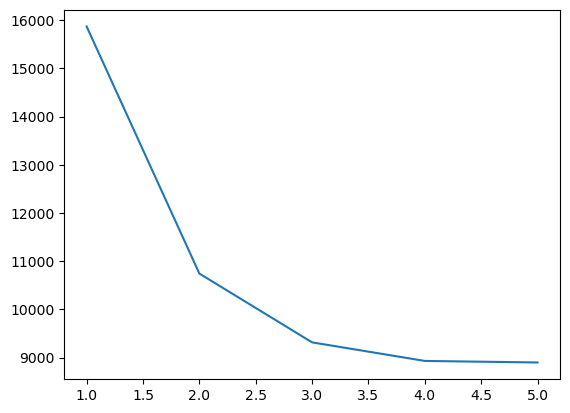

In [877]:
def one_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train = poly_transform_2(X_Train,3)
X_Transformed_Test  = poly_transform_2(X_Test,3)
W_one = one_deg(X_transformed_Train, Y_Train)
W_one
print(W_one)
Y_pred_one_deg = np.dot(X_Transformed_Test, W_one)

mse_one = mean_squared_error_one_deg(Y_Test, Y_pred_one_deg)
print(mse_one)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_one = []
for i in degrees:
    X_Train_poly_bch_one = poly_transform_2(X_Train, i)
    X_Test_poly_bch_one = poly_transform_2(X_Test, i)
    W_bch_one = one_deg(X_Train_poly_bch_one, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_one,W_bch_one)
    mse_bch_one = mean_squared_error_one_deg(Y_Test, Y_Test_pred)
    output_bch_one.append(mse_bch_one)

print(output_bch_one)
plt.plot(degrees, output_bch_one)
plt.show()

## Batch gradient descent with q as 2

[107.10892864  20.27488883  52.87112991  61.04273083  97.87362716
  20.96086266  64.76568389]
38706.972908234544
[59347.06891007902, 38787.62486061091, 38706.972908234544, 46049.7311531108, 43528.86438506424, 35941.81137415883, 35756.72626686574, nan, nan]


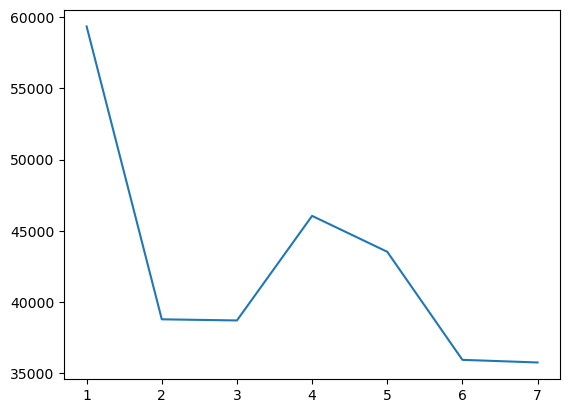

In [878]:
def two_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0002, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l1_penalty*(np.abs(W))
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_two = poly_transform_2(X_Train,3)
X_transformed_Test_two = poly_transform_2(X_Test,3)
W_two = two_deg(X_transformed_two, Y_Train)
print(W_two)
Y_pred_two_deg = np.dot(X_transformed_Test_two, W_two)
mse_two = mean_squared_error_two_deg(Y_Test, Y_pred_two_deg)
print(mse_two)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_two = []
for i in degrees:
    X_Train_poly_bch_two = poly_transform_2(X_Train, i)
    X_Test_poly_bch_two = poly_transform_2(X_Test, i)
    W_bch_two = two_deg(X_Train_poly_bch_two, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_two,W_bch_two)
    mse_bch_two = mean_squared_error_two_deg(Y_Test, Y_Test_pred)
    output_bch_two.append(mse_bch_two)

print(output_bch_two)
plt.plot(degrees, output_bch_two)
plt.show()

## Batch gradient descent with q as 4

[7.20083625 5.85534726 6.57762879 7.34359085 7.8633893  8.1690439
 8.55650586]
197613.16543502902


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/2680744456.py:6: RuntimeWarning: overflow encountered in power
  gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))
/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/2680744456.py:6: RuntimeWarning: invalid value encountered in add
  gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))


[227624.66373898849, 215407.56148662575, 197613.16543502902, 168521.8120189279, 139981.63766742116, nan, nan, nan, nan]


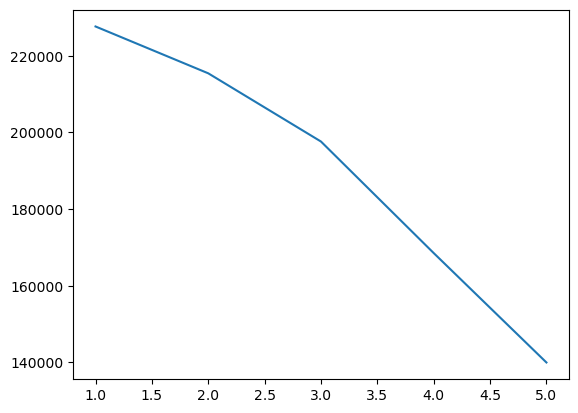

In [879]:
def four_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.005, l1_penalty = 0.5, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_four_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_four = poly_transform_2(X_Train,3)
X_transformed_Test_four = poly_transform_2(X_Test,3)
W_four = four_deg(X_transformed_four, Y_Train)
print(W_four)
Y_pred_four_deg = np.dot(X_transformed_Test_four, W_four)
mse_four = mean_squared_error_four_deg(Y_Test, Y_pred_four_deg)
print(mse_four)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_four = []
for i in degrees:
    X_Train_poly_bch_four = poly_transform_2(X_Train, i)
    X_Test_poly_bch_four = poly_transform_2(X_Test, i)
    W_bch_four = four_deg(X_Train_poly_bch_four, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_four,W_bch_four)
    mse_bch_four = mean_squared_error_four_deg(Y_Test, Y_Test_pred)
    output_bch_four.append(mse_bch_four)

print(output_bch_four)
plt.plot(degrees, output_bch_four)
plt.show()

# Stocastic Gradeint Descent

## Stocastic gradient descent with q as 0.5

/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/2810593580.py:24: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


[13535.518734021094, 10967.951905659864, 14915.974238806319, 10438.015365671243, 4.940569738680099e+18, inf, nan, nan, nan]


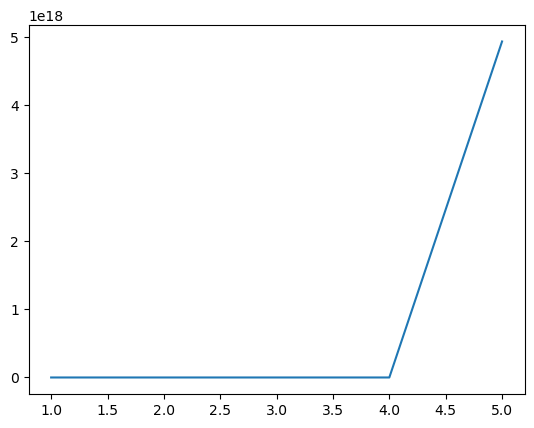

In [880]:
def half_reg_stc(X:np.ndarray, Y:np.ndarray,max_iter = 5000 ,penalty = 0.07, learning_rate = 1e-3):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        idx = np.random.randint(0, n-1)
        X_temp = X[idx]
        Y_temp = Y[idx]
        Y_pred = np.dot(X_temp,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
                break

        if flag == False:
            grad = np.dot(X_temp.T, Y_pred-Y_temp)
        else:
            grad = np.dot(X_temp.T, Y_pred-Y_temp) + penalty*0.5*np.abs(W)**-0.5
        W -= learning_rate*grad
        learning_rate /=1.00005
    return W

def mean_squared_error_stc_half(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_half = []
for i in degrees:
    X_Train_poly_stc_half = poly_transform_2(X_Train, i)
    X_Test_poly_stc_half = poly_transform_2(X_Test, i)
    W_stc_half = half_reg_stc(X_Train_poly_stc_half, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_half,W_stc_half)
    mse_stc_half = mean_squared_error_stc_half(Y_Test, Y_Test_pred)
    output_stc_half.append(mse_stc_half)
 
print(output_stc_half)
plt.plot(degrees, output_stc_half)
plt.show()

## Stocastic gradient descent with q as 1

[41569.05403162731, 27928.22544227952, 33975.30276191431, 43327.74689124964, 34223.390565417416, 11636334833404.75, 3.2656103009040146e+260, nan, nan]


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/3967441090.py:11: RuntimeWarning: invalid value encountered in subtract
  W -= change


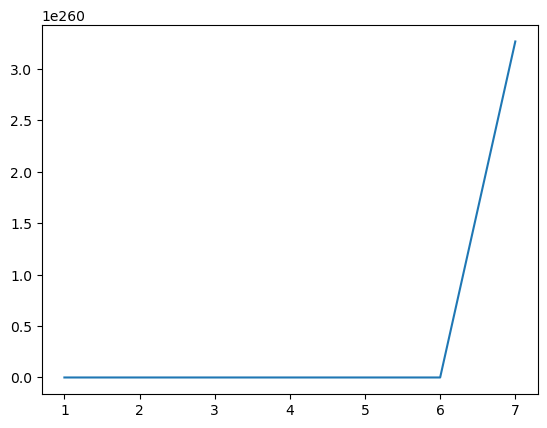

In [881]:
def one_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_one = []
for i in degrees:
    X_Train_poly_stc_one = poly_transform_2(X_Train, i)
    X_Test_poly_stc_one = poly_transform_2(X_Test, i)
    W_stc_one = one_deg_stoic(X_Train_poly_stc_one, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_one,W_stc_one)
    mse_stc_one = mean_squared_error_one_deg(Y_Test, Y_Test_pred)
    output_stc_one.append(mse_stc_one)
 
print(output_stc_one)
plt.plot(degrees, output_stc_one)
plt.show()

## Stocastic gradient descent with q as 2

[94915.53715588548, 61640.431665544485, 52690.760692943804, 58143.33547145006, 57980.97478670725, 23981105981617.05, 1.9854191795888622e+244, nan, nan]


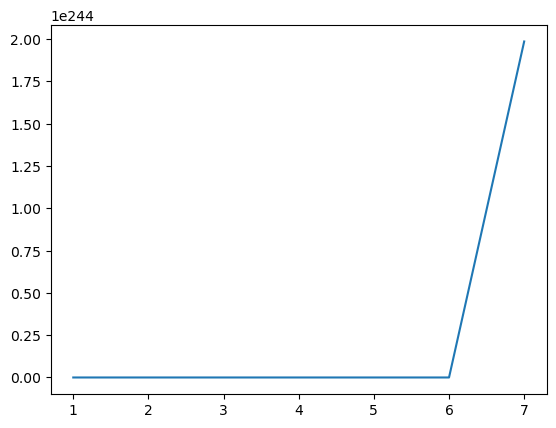

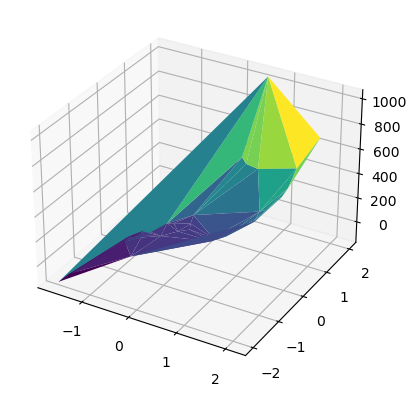

In [882]:
def two_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + l1_penalty*np.abs(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg_stoic(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_two = []
for i in degrees:
    X_Train_poly_stc_two = poly_transform_2(X_Train, i)
    X_Test_poly_stc_two = poly_transform_2(X_Test, i)
    W_stc_two = two_deg_stoic(X_Train_poly_stc_two, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_two,W_stc_two)
    mse_stc_two = mean_squared_error_two_deg_stoic(Y_Test, Y_Test_pred)
    output_stc_two.append(mse_stc_two)
 
print(output_stc_two)
plt.plot(degrees, output_stc_two)
plt.show()
X_Train_poly_stc_two = poly_transform_2(X_Train, 3)
X_Test_poly_stc_two = poly_transform_2(X_Test, 3)
W_stc_two = two_deg_stoic(X_Train_poly_stc_two, Y_Train)
Y_Test_pred = np.dot(X_Test_poly_stc_two,W_stc_two)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred, cmap='viridis', edgecolor='none')
plt.show()

## Stocastic gradient descent with q as 4

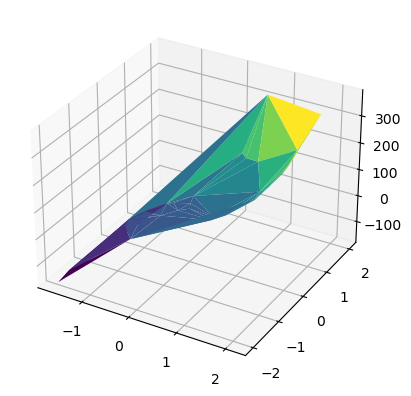

In [883]:
def four_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 1e-4, l1_penalty = 0.009, max_iters = 1000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 3/2*l1_penalty*W**3
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_four_deg_stoic(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# degrees = [1,2,3,4,5,6,7,8,9]
# output_stc_four = []
# for i in degrees:
    # x, y = np.meshgrid(X_Test_Height, X_Test_Width)
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x, y, Y_Test_pred)
    # plt.show()
from mpl_toolkits.mplot3d import Axes3D

# x, y, z are arrays of the same length containing the cartesian coordinates of the points
X_Train_poly_stc_four = poly_transform_2(X_Train, 3)
X_Test_poly_stc_four = poly_transform_2(X_Test, 3)
W_stc_four = four_deg_stoic(X_Train_poly_stc_four, Y_Train)
Y_Test_pred = np.dot(X_Test_poly_stc_four,W_stc_four)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred, cmap='viridis', edgecolor='none')
plt.show()
